In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix,accuracy_score,auc,classification_report,roc_auc_score,roc_curve

from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use("fivethirtyeight")


# <center><h1 style='color:green'>Dataset Description</h1></center>

<li>PassengerId:	The passenger's Id number	
<li>Survived:	Survival	0 = No, 1 = Yes
<li>Pclass:	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
<li>Name:	Name of the passenger	
<li>Sex:	Sex	[Male, Female]
<li>Age:	Age in years	
<li>SibSp:	# of siblings / spouses aboard the Titanic	
<li>Parch:	# of parents / children aboard the Titanic	
<li>Ticket:	Ticket number	
<li>Fare:	Passenger fare	
<li>Cabin:	Cabin number	
<li>Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

<center><h1 style='color:red; font:50px'>Objective</h1></center>
<p style='color:green'> Find wether the given passenger will die or not with test Data</p> 

In [2]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## EDA

### 1.Handling  Missing Values

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

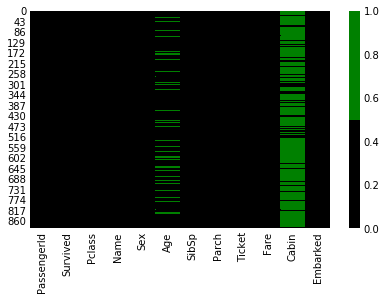

In [5]:
sns.heatmap(df.isna(),cmap=['black','green'])

In [6]:
df['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [7]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [8]:
df.Age.quantile([0,0.25,0.50,0.75,])

0.00     0.420
0.25    20.125
0.50    28.000
0.75    38.000
Name: Age, dtype: float64

No.of people: 714


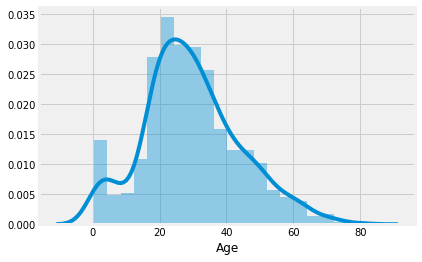

In [9]:
sns.distplot(df['Age'].dropna(axis=0))
print("No.of people:",df['Age'].count())

Median of below Age 12: 4.0
No.of people below 12: 69


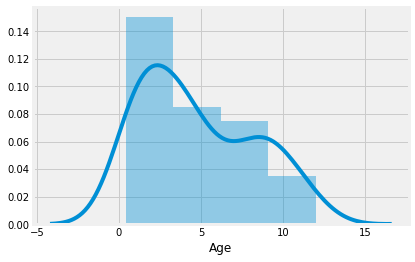

In [10]:
sns.distplot(df[df['Age']<=12]['Age'].dropna(axis=0))
print("Median of below Age 12:",df[df['Age']<=12]['Age'].median())
print("No.of people below 12:",df[df['Age']<=12]['Age'].count())

In [11]:
df[df['Age']<=12]['Age'].median()

4.0

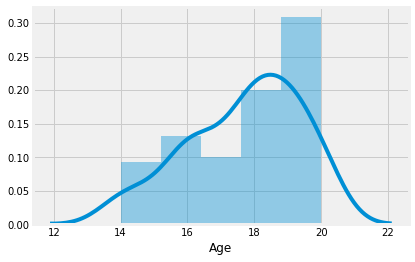

In [12]:
sns.distplot(df[(df['Age']>13) & (df['Age']<=20)]['Age'].dropna(axis=0))

In [13]:
df[(df['Age']>13) & (df['Age']<=20)]['Age'].median()

18.0

In [14]:
df[(df['Age']>13) & (df['Age']<=20)]['Age'].count()

108

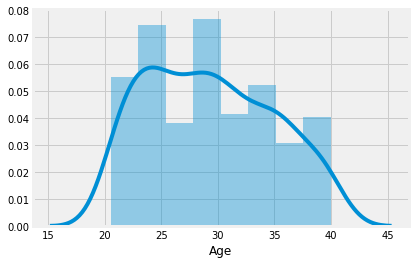

In [15]:
sns.distplot(df[(df['Age']>20) & (df['Age']<=40)]['Age'].dropna(axis=0))

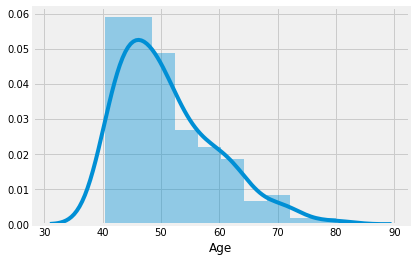

In [16]:
sns.distplot(df[df['Age']>40]['Age'].dropna(axis=0))

In [17]:
def age_fill(age):
    if age <=12:
        return 'child'
    elif age>13 and age <=20:
        return 'tenager'
    elif age>20 and age<=40:
        return 'middle age'
    else:
        return 'oldage'

In [18]:
print(age_fill(78))
print(age_fill(10))
print(age_fill(15))
print(age_fill(30))

oldage
child
tenager
middle age


In [19]:
df['Age_cat']=df['Age'].apply(age_fill)

In [20]:
df['Age_cat'].value_counts()

middle age    385
oldage        329
tenager       108
child          69
Name: Age_cat, dtype: int64

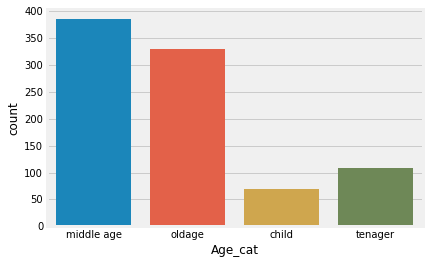

In [21]:
sns.countplot(df['Age_cat'])

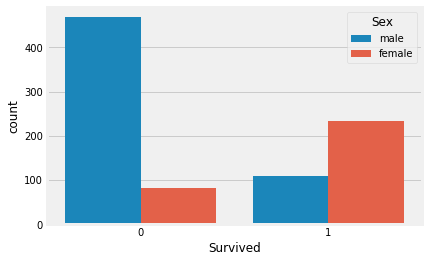

In [22]:
sns.countplot(df['Survived'],hue=df['Sex'])

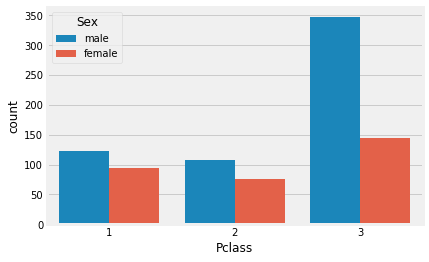

In [23]:
sns.countplot(df['Pclass'],hue=df['Sex'])

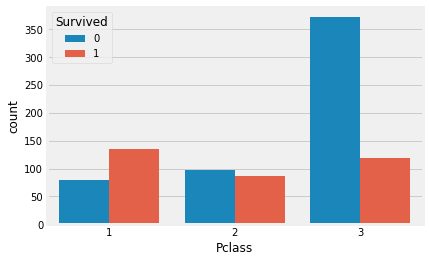

In [24]:
sns.countplot(df['Pclass'],hue=df['Survived'])

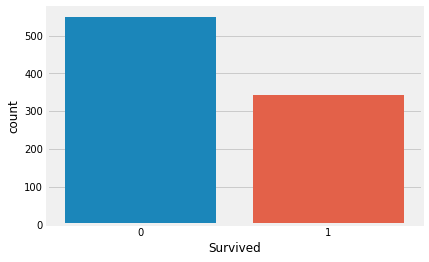

In [25]:
sns.countplot(df['Survived'])

In [26]:
cl = df[['Sex','Pclass','Survived']]
cl.head(1)

,Sex,Pclass,Survived
0,male,3,0


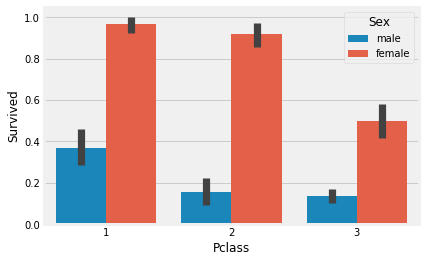

In [27]:
sns.barplot(x=df['Pclass'],y=df['Survived'],hue=df['Sex'])
plt.yscale('linear')

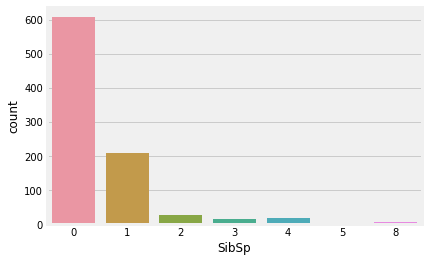

In [28]:
sns.countplot(df['SibSp'])

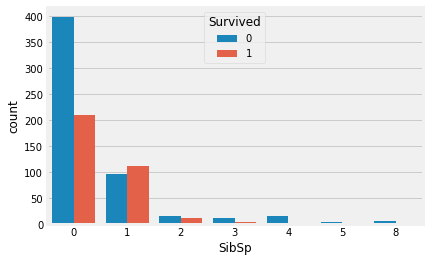

In [29]:
sns.countplot(df['SibSp'],hue=df['Survived'])

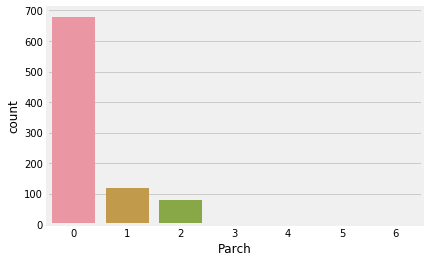

In [30]:
sns.countplot(df['Parch'])

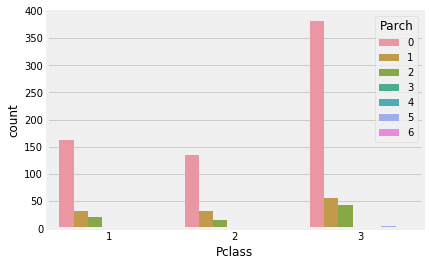

In [31]:
sns.countplot(df['Pclass'],hue=df['Parch'])

In [32]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

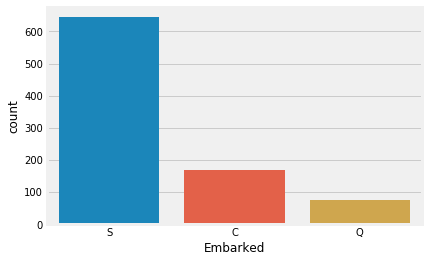

In [33]:
sns.countplot(df['Embarked'])

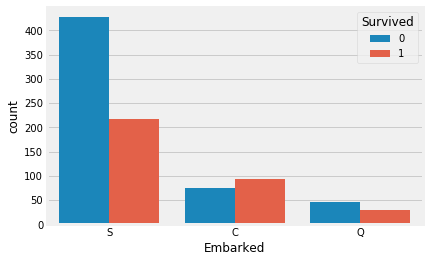

In [34]:
sns.countplot(df['Embarked'],hue=df['Survived'])

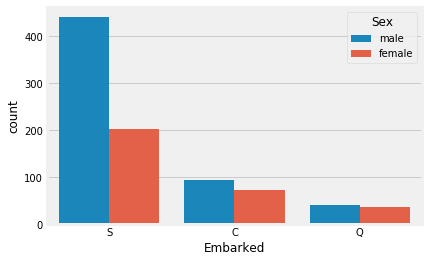

In [35]:
sns.countplot(df['Embarked'],hue=df['Sex'])

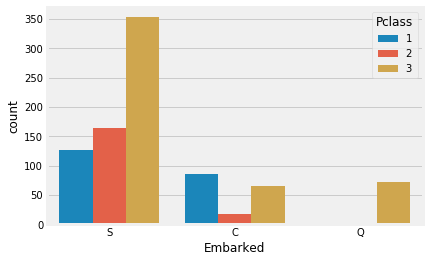

In [36]:
sns.countplot(df['Embarked'],hue=df['Pclass'])

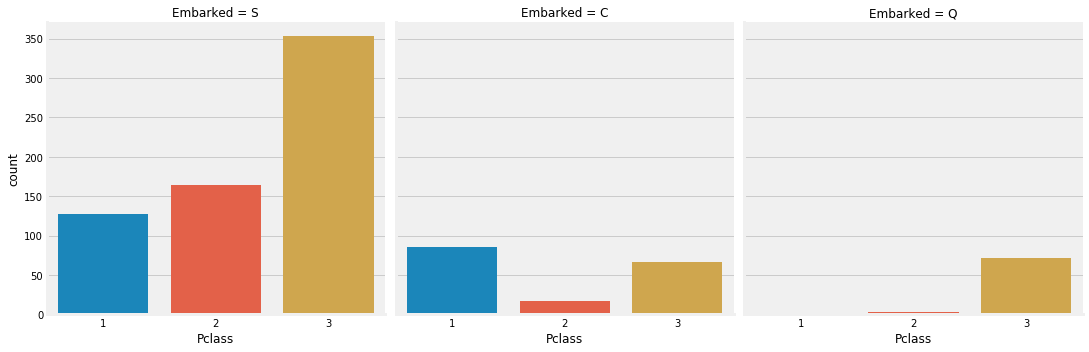

In [37]:
sns.catplot(x='Pclass', col='Embarked', kind='count', data=df)

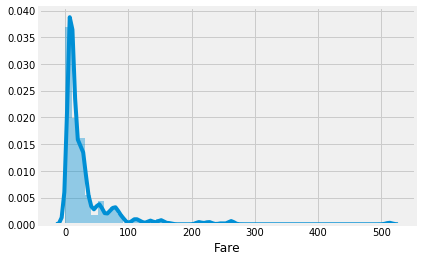

In [38]:
sns.distplot(df['Fare'])

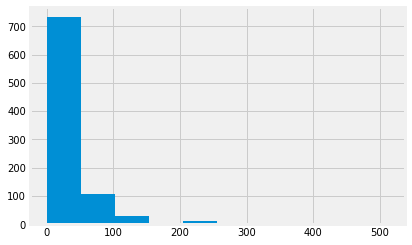

In [39]:
plt.hist(df['Fare'])
plt.show()

In [40]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

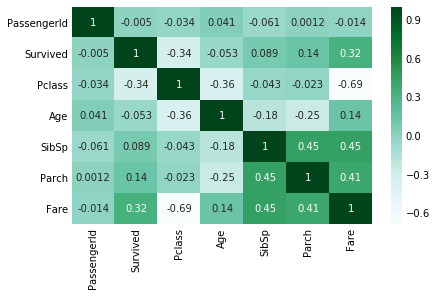

In [41]:
corr_matrix = df.corr(method='spearman')
sns.heatmap(corr_matrix,annot=True,cmap='BuGn')

In [42]:
corr_matrix['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.339668
Age           -0.052565
SibSp          0.088879
Parch          0.138266
Fare           0.323736
Name: Survived, dtype: float64

## Data Preparation

In [43]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,middle age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,middle age


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_cat          0
dtype: int64

In [45]:
df.drop('Cabin',axis=1,inplace=True)

In [46]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Age_cat'],
      dtype='object')

In [47]:
df['Age'].median()

28.0

In [48]:
df['Age'] = df['Age'].fillna(28)

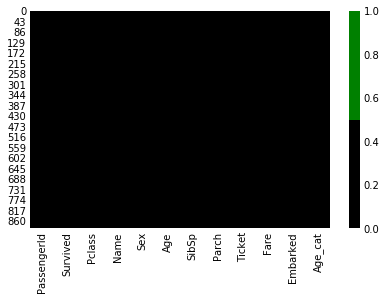

In [49]:
sns.heatmap(df.isna(),cmap=['black','green'])

In [50]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Age_cat        0
dtype: int64

In [51]:
df.dropna(axis=1,inplace=True)

In [52]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Age_cat        0
dtype: int64

In [53]:
df.drop(['PassengerId','Fare','Ticket','Age_cat','Name'],axis=1,inplace=True)

In [54]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


In [55]:
def gender(sex):
    if sex == 'male':
        return 1
    else:
        return 0

In [56]:
df['Sex'] = df['Sex'].apply(gender)

In [57]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0


In [58]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

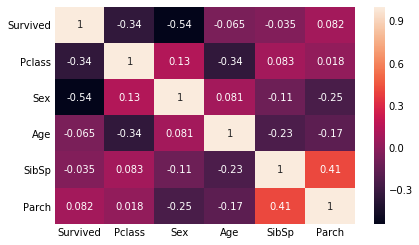

In [59]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)

In [60]:
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000


In [61]:
corr_matrix['Survived']

Survived    1.000000
Pclass     -0.338481
Sex        -0.543351
Age        -0.064910
SibSp      -0.035322
Parch       0.081629
Name: Survived, dtype: float64

In [62]:
x  = np.array(df[['Pclass','Sex','Age','SibSp','Parch']])
y = df['Survived']

## KNN

In [63]:
knn = KNeighborsClassifier(algorithm='kd_tree')
k =  list(range(1,31,2))
param_grid = {'n_neighbors':k}
param_grid

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}

In [64]:
grid_knn = GridSearchCV(knn,cv=5,param_grid=param_grid,scoring='f1')

In [65]:
grid_knn.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [66]:
grid_knn.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
k = grid_knn.best_params_['n_neighbors']
k

5

In [68]:
knn = KNeighborsClassifier(n_jobs=4,n_neighbors=k,algorithm='auto')
knn.fit(x,y)
y_pred_knn = knn.predict(x)

In [69]:
acc_knn = accuracy_score(y,y_pred_knn)
print("Accuracy on Train Data:",acc_knn)

Accuracy on Train Data: 0.8451178451178452


#### Confusion matrix

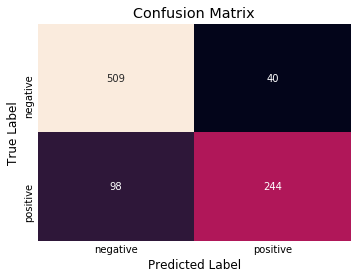

In [70]:
cm=confusion_matrix(y,y_pred_knn)

class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot = True,cbar=False,fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### roc-auc curves

In [71]:
fpr_knn, tpr_knn, thresholds = roc_curve(y_pred_knn, y)
auc_score_knn= auc(fpr_knn, tpr_knn)
print("AUC Score on Train data:",(auc_score_knn)*100)

AUC Score on Train data: 84.88525883472168


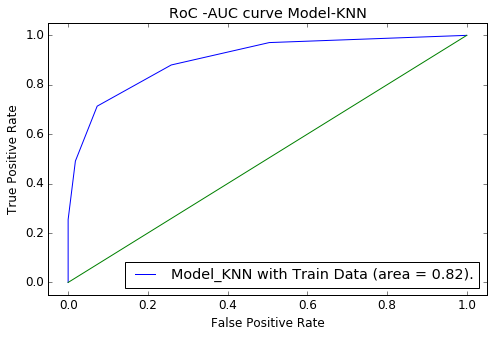

In [72]:
roc_auc_knn = roc_auc_score(y,y_pred_knn)
fpr_knn,tpr_knn,thersholds = roc_curve(y,knn.predict_proba(x)[:,1])

plt.figure(figsize=(7,5))
plt.style.use('classic')

plt.plot(fpr_knn,tpr_knn,label='Model_KNN with Train Data (area = %.2f).'% roc_auc_knn)
plt.plot([0,1],[0,1])
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc=0)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("RoC -AUC curve Model-KNN")

plt.show()

In [73]:
print(classification_report(y,y_pred_knn,target_names=['died','survived']))

              precision    recall  f1-score   support

        died       0.84      0.93      0.88       549
    survived       0.86      0.71      0.78       342

   micro avg       0.85      0.85      0.85       891
   macro avg       0.85      0.82      0.83       891
weighted avg       0.85      0.85      0.84       891



## Logistic Regression

In [74]:
lam =[0.001,0.01,0.1,1.0,10,100,1000]
param_grid=dict(C=lam)
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}


In [75]:
lr= LogisticRegression(penalty='l2')

In [76]:
grid_lr = GridSearchCV(lr, param_grid=param_grid,cv=5,scoring='f1')
grid_lr.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [77]:
grid_lr.best_params_

{'C': 10}

In [78]:
grid_lr.estimator

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [79]:
grid_lr.best_score_

0.7116758164993587

In [80]:
lr = LogisticRegression(penalty='l2',C=10)
lr.fit(x,y)
y_pred_lr = lr.predict(x)
acc_lr = accuracy_score(y,y_pred_lr)
print('Accuracy :',acc_lr*100)

Accuracy : 78.90011223344557


#### Confusion Matrix

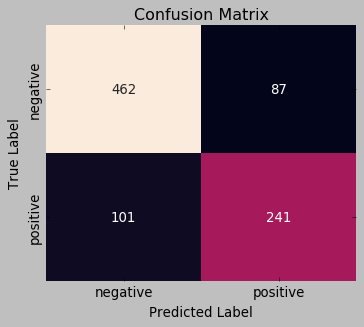

In [81]:
cm=confusion_matrix(y,y_pred_lr)

class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot = True,cbar=False,fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### AUC,roc-auc curve

In [82]:
fpr_lr, tpr_lr, thresholds = roc_curve(y_pred_lr, y)
auc_score_lr= auc(fpr_lr, tpr_lr)
print("AUC Score on Train data:",(auc_score_lr)*100)

AUC Score on Train data: 77.76800025993155


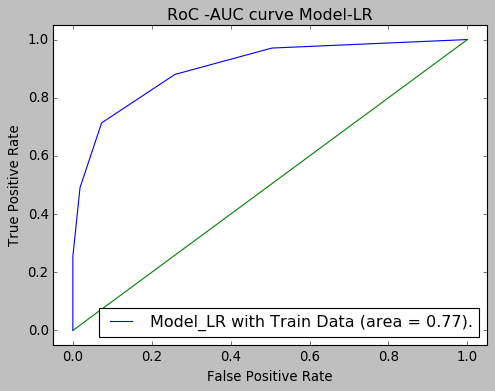

In [83]:
roc_auc_lr = roc_auc_score(y,y_pred_lr)
fpr_lr,tpr_lr,thersholds = roc_curve(y,lr.predict_proba(x)[:,1])

plt.figure(figsize=(7,5))
plt.style.use('classic')

plt.plot(fpr_knn,tpr_knn,label='Model_LR with Train Data (area = %.2f).'% roc_auc_lr)
plt.plot([0,1],[0,1])
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc=0)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("RoC -AUC curve Model-LR")

plt.show()

In [84]:
print(classification_report(y_pred_lr,y,target_names=['died','survived']))

              precision    recall  f1-score   support

        died       0.84      0.82      0.83       563
    survived       0.70      0.73      0.72       328

   micro avg       0.79      0.79      0.79       891
   macro avg       0.77      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



## Naive Bayes

In [85]:
hyper =[0.0001,0.001,0.01,0.1,1.0,10,100,1000]
param_grid=dict(alpha=hyper)
print(param_grid)

{'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]}


In [86]:
mnb= MultinomialNB(class_prior=[0.5,0.5])

In [87]:
grid_mnb = GridSearchCV(mnb, param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=4)
grid_mnb.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=MultinomialNB(alpha=1.0, class_prior=[0.5, 0.5], fit_prior=True),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [88]:
grid_mnb.best_estimator_

MultinomialNB(alpha=0.0001, class_prior=[0.5, 0.5], fit_prior=True)

In [89]:
grid_mnb.best_params_

{'alpha': 0.0001}

In [90]:
mnb = MultinomialNB(alpha=0.0001,class_prior=[0.5,0.5])
mnb.fit(x,y)
y_pred_mnb = mnb.predict(x)
acc_mnb = accuracy_score(y,y_pred_mnb)
print("Accuracy:",acc_mnb*100)

Accuracy: 72.39057239057239


#### Auc-roc curve

In [91]:
fpr_mnb, tpr_mnb, thresholds = roc_curve(y_pred_mnb, y)
auc_score_mnb= auc(fpr_mnb, tpr_mnb)
print("AUC Score on data:",(auc_score_mnb)*100)

AUC Score on data: 70.98594847775176


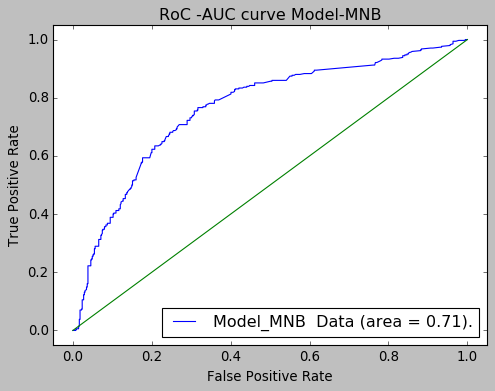

In [92]:
roc_auc_mnb = roc_auc_score(y,y_pred_mnb)
fpr_mnb,tpr_mnb,thersholds = roc_curve(y,mnb.predict_proba(x)[:,1])

plt.figure(figsize=(7,5))
plt.style.use('classic')
plt.plot(fpr_mnb,tpr_mnb,label='Model_MNB  Data (area = %.2f).'% roc_auc_mnb)
plt.plot([0,1],[0,1])
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc=0)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("RoC -AUC curve Model-MNB")

plt.show()


  #### Confusion Matrix

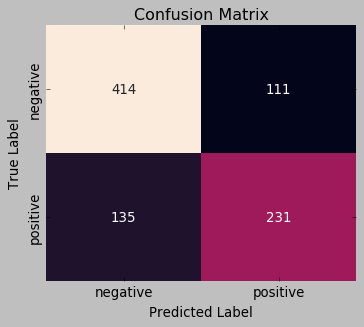

In [93]:
cm=confusion_matrix(y_pred_mnb,y)

class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
plt.figure(figsize=(5,4))
sns.heatmap(df_cm, annot = True,cbar=False,fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
print(classification_report(y,y_pred_mnb,target_names=['died','survived']))

              precision    recall  f1-score   support

        died       0.79      0.75      0.77       549
    survived       0.63      0.68      0.65       342

   micro avg       0.72      0.72      0.72       891
   macro avg       0.71      0.71      0.71       891
weighted avg       0.73      0.72      0.73       891



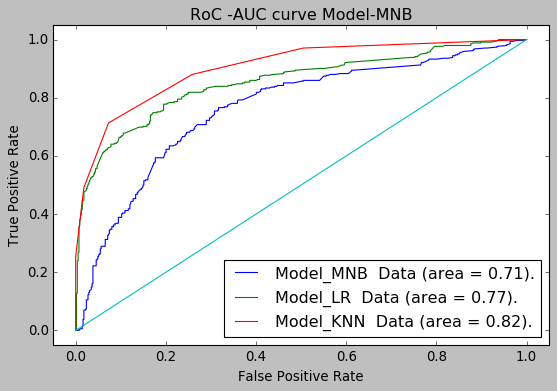

In [95]:
plt.figure(figsize=(8,5))
plt.style.use('classic')
plt.plot(fpr_mnb,tpr_mnb,label='Model_MNB  Data (area = %.2f).'% roc_auc_mnb)
plt.plot(fpr_lr,tpr_lr,label='Model_LR  Data (area = %.2f).'% roc_auc_lr)
plt.plot(fpr_knn,tpr_knn,label='Model_KNN  Data (area = %.2f).'% roc_auc_knn)

plt.plot([0,1],[0,1])
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc=0)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("RoC -AUC curve Model-MNB")

plt.show()


In [96]:
x = PrettyTable()

x.field_names=['Model','Hyper parameter','auc score']

x.add_row(['KNN',grid_knn.best_params_['n_neighbors'],np.round(auc_score_knn,2)])
x.add_row(['LR',grid_lr.best_params_['C'],np.round(auc_score_lr,2)])
x.add_row(['MNB',grid_mnb.best_params_['alpha'],np.round(auc_score_mnb,2)])

print(x)

+-------+-----------------+-----------+
| Model | Hyper parameter | auc score |
+-------+-----------------+-----------+
|  KNN  |        5        |    0.85   |
|   LR  |        10       |    0.78   |
|  MNB  |      0.0001     |    0.71   |
+-------+-----------------+-----------+


<center><h2 style='color:green'> Thank you..! </h2></center>